In [1]:
# import needed libraries
from time import time
from random import random
from matplotlib import colors, animation, pyplot as plt
import numba
import numpy as np

In [2]:
# variables to initializing the forest

NO_TREE = 0 # represents an area with no trees
TREE = 1 # represents an area with trees
TREE_ON_FIRE = 2 # represents an area trees on fire

bounds = [0, 1, 2, 3]
cmap = colors.ListedColormap(['brown', 'green', 'red', 'orange'])
norm = colors.BoundaryNorm(bounds, cmap.N)

interval = 200 # represents the delay between each image of the animation/ spread of fire in milliseconds.
frame_size = 50 # represents the size of the frame in pixels, or number of iterations of the simulation.

probBurning = 0.01 # represents the probability that a tree is on fire
probImmune = 0.3 # represents the probability that a tree is immune to fire
probLightning = 0.001 # represents the probability that an area suffered a lightning strike
probTree = 0.8 # represents the probability that an area is occupied by a tree

Non Parallel Simulation of the Spread

In [3]:
# initialize the forest site
def InitializeForest(forestSize):
    
    # creating a two-dimensional array of the forestgrid of size forestSize with no trees
    forestGrid = np.zeros((forestSize, forestSize))
    
    # now we fill the forest with trees, empty area and trees on fire
    for i in range(forestSize):
        for j in range(forestSize):
            
            # if there is a tree, we set the value of the area to TREE
            if random() < probTree:
                # if the tree is on fire, we set the value of the area to TREE_ON_FIRE
                if random() < probBurning:
                    
                    forestGrid[i][j] = TREE_ON_FIRE
                else:
                    # the tree is not on fire, we set the value of the area to TREE
                    forestGrid[i][j] = TREE
            else:
                # the area is empty
                forestGrid[i][j] = NO_TREE
                
    # return the forest grid
    return forestGrid
    

In [4]:
# function to apply the spread to the forest site using the Moore neighborhood algorithm
def ApplyTheSpreadWithMoore(forest, forestSize):
    
    # looping through the forest grids (excluding the borders)
    for i in range(1, forestSize + 1):
        for j in range(1, forestSize + 1):
            
            # if the area has a tree
            if forest[i][j] == TREE:
                    
                # if a tree on the 8 moore neighborhoods 
                # (south, south-east, south-west, west, east, north, north-east, north-west)
                # is on fire, then the tree is likely to burn if it's not immune
                if (forest[i - 1][j] == TREE_ON_FIRE or forest[i + 1][j] == TREE_ON_FIRE or 
                    forest[i][j - 1] == TREE_ON_FIRE or forest[i][j + 1] == TREE_ON_FIRE or 
                    forest[i - 1][j - 1] == TREE_ON_FIRE or forest[i - 1][j + 1] == TREE_ON_FIRE or 
                    forest[i + 1][j - 1] == TREE_ON_FIRE or forest[i + 1][j + 1] == TREE_ON_FIRE):
    
                    # if the tree is immune to fire it will not burn
                    if random() < probImmune:
                        forest[i][j] = TREE
                    else:
                        forest[i][j] = TREE_ON_FIRE
                        
                # if the forest site suffered a lightning strike the tree is likely burns
                elif random() < probLightning:
                    
                    # # if the tree is immune to fire it will not burn
                    if random() < probImmune:
                        forest[i][j] = TREE
                    else:
                        forest[i][j] = TREE_ON_FIRE
                
                # else the tree doesn't burn cause there are no external influences
                else:
                    forest[i][j] = TREE 
            
            # if the area has a tree already on fire, then it burns to the ground
            elif forest[i][j] == TREE_ON_FIRE:
                forest[i][j] = NO_TREE
            
            # otherwise the area remains empty since there is no tree
            else:
                forest[i][j] = NO_TREE
            
    return forest

In [5]:
# extend the grid using periodic boundary conditions
def ExtendTheForestGrids(forest, forestSize):
    
    # extending the forest grid boundaries with ghost cells of opposite boundaries at all sides
    row_stack = np.row_stack((forest[-1,:], forest, forest[0,:]))
    extendedGrid = np.column_stack((row_stack[:,-1], row_stack, row_stack[:,0]))
    
    # now we can spread the fire  
    extendedGrid = ApplyTheSpreadWithMoore(extendedGrid, forestSize)
    
    # remove the ghost cells around the boundaries before plotting
    forest = extendedGrid[1:forestSize + 1, 1:forestSize + 1]
        
    return forest

Time used for an iteration (initializtion, fire expansion ) on grid size 100: 0.06399202346801758 seconds


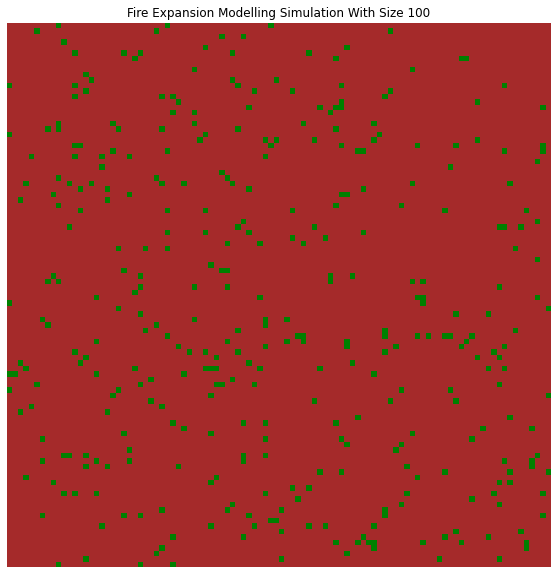

In [25]:
initTime = time()
forestSize = 100

forest = InitializeForest(forestSize)

ExtendTheForestGrids(forest, forestSize)

print("Time used for an iteration (initializtion, fire expansion ) on grid size {0}: {1} seconds".format(forestSize, time() - initTime))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_aspect('equal')
ax.set_title('Fire Expansion Modelling Simulation With Size {0}'.format(forestSize))
    
# plot the forest grid
siteGridInColor = ax.imshow(forest, cmap=cmap, norm=norm)
    
def animate(i):
    siteGridInColor.set_data(animate.siteGrid)
    animate.siteGrid = ExtendTheForestGrids(animate.siteGrid, forestSize)

animate.siteGrid = forest

anim = animation.FuncAnimation(fig, animate, interval=interval, frames=frame_size)

# save animation as gif file
anim.save('fire_expansion_simulation_{0}.gif'.format(forestSize))

plt.show()

Time used for an iteration (initializtion, fire expansion ) on grid size 400: 1.0905864238739014 seconds


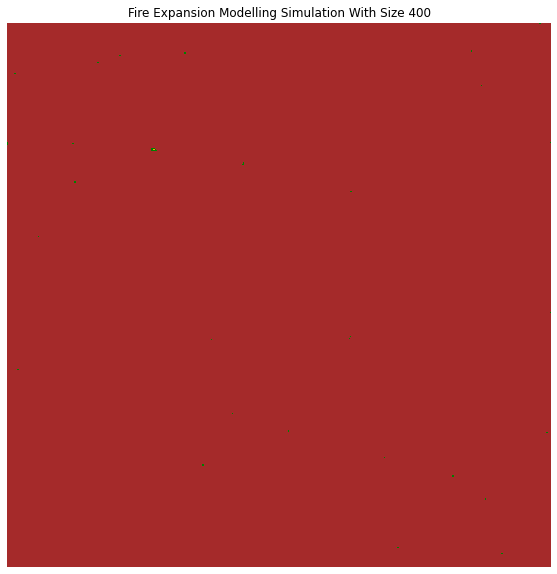

In [7]:
initTime = time()
forestSize = 400

forest = InitializeForest(forestSize)

ExtendTheForestGrids(forest, forestSize)

print("Time used for an iteration (initializtion, fire expansion ) on grid size {0}: {1} seconds".format(forestSize, time() - initTime))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_title('Fire Expansion Modelling Simulation With Size {0}'.format(forestSize))
ax.set_axis_off()
    
# plot the forest grid
siteGridInColor = ax.imshow(forest, cmap=cmap, norm=norm)
    
def animate(i):
    siteGridInColor.set_array(animate.siteGrid)
    animate.siteGrid = ExtendTheForestGrids(animate.siteGrid, forestSize)

animate.siteGrid = forest

anim = animation.FuncAnimation(fig, animate, interval=interval, frames=frame_size)

# save animation as gif file
anim.save('fire_expansion_simulation_{0}.gif'.format(forestSize))

plt.show()

Time used for an iteration (initializtion, fire expansion ) on grid size 800: 2.9476656913757324 seconds


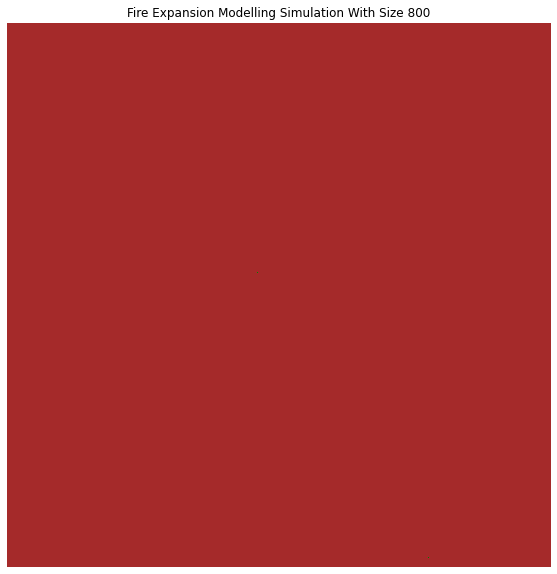

In [8]:
initTime = time()
forestSize = 800

forest = InitializeForest(forestSize)

ExtendTheForestGrids(forest, forestSize)

print("Time used for an iteration (initializtion, fire expansion ) on grid size {0}: {1} seconds".format(forestSize, time() - initTime))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_title('Fire Expansion Modelling Simulation With Size {0}'.format(forestSize))
ax.set_axis_off()
    
# plot the forest grid
siteGridInColor = ax.imshow(forest, cmap=cmap, norm=norm)
    
def animate(i):
    siteGridInColor.set_array(animate.siteGrid)
    animate.siteGrid = ExtendTheForestGrids(animate.siteGrid, forestSize)

animate.siteGrid = forest

anim = animation.FuncAnimation(fig, animate, interval=interval, frames=frame_size)

# save animation as gif file
anim.save('fire_expansion_simulation_{0}.gif'.format(forestSize))

plt.show()

Time used for an iteration (initializtion, fire expansion ) on grid size 1000: 5.226000070571899 seconds


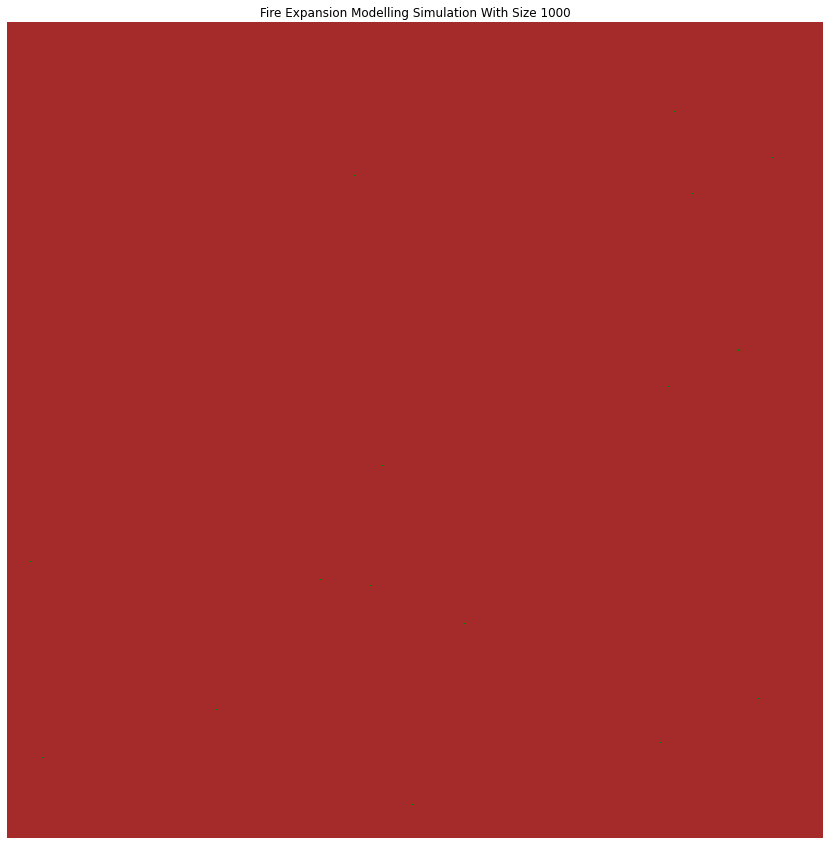

In [9]:
initTime = time()
forestSize = 1000

forest = InitializeForest(forestSize)

ExtendTheForestGrids(forest, forestSize)

print("Time used for an iteration (initializtion, fire expansion ) on grid size {0}: {1} seconds".format(forestSize, time() - initTime))

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_title('Fire Expansion Modelling Simulation With Size {0}'.format(forestSize))
ax.set_axis_off()
    
# plot the forest grid
siteGridInColor = ax.imshow(forest, cmap=cmap, norm=norm)
    
def animate(i):
    siteGridInColor.set_array(animate.siteGrid)
    animate.siteGrid = ExtendTheForestGrids(animate.siteGrid, forestSize)

animate.siteGrid = forest

anim = animation.FuncAnimation(fig, animate, interval=interval, frames=frame_size)

# save animation as gif file
anim.save('fire_expansion_simulation_{0}.gif'.format(forestSize))

plt.show()

Time used for an iteration (initializtion, fire expansion ) on grid size 1200: 8.252012968063354 seconds


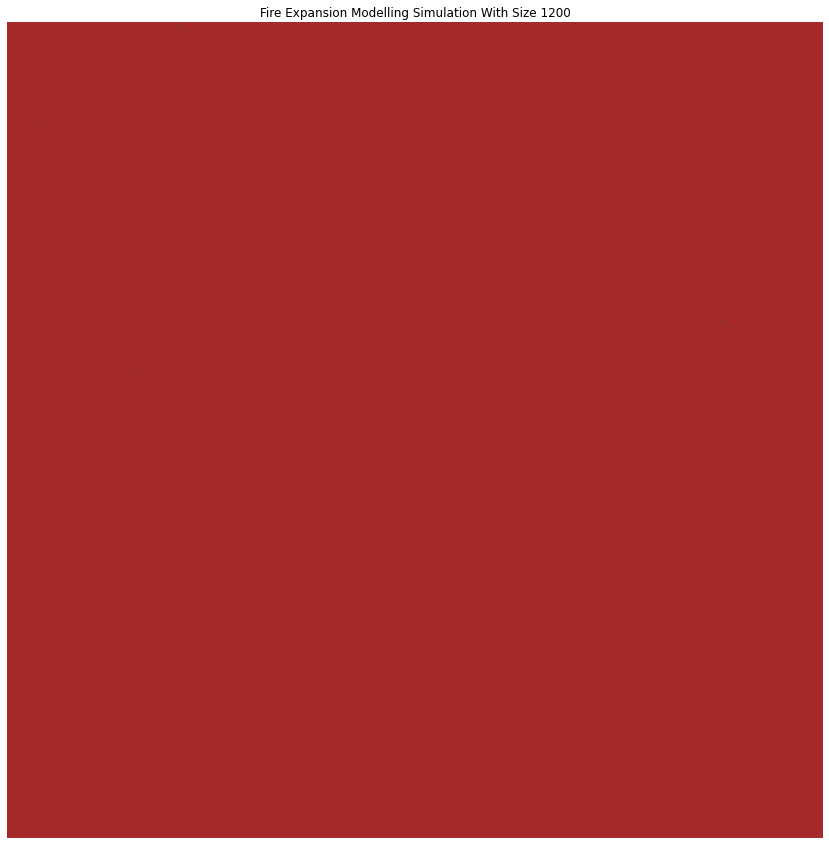

In [10]:
initTime = time()
forestSize = 1200

forest = InitializeForest(forestSize)

ExtendTheForestGrids(forest, forestSize)

print("Time used for an iteration (initializtion, fire expansion ) on grid size {0}: {1} seconds".format(forestSize, time() - initTime))

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_title('Fire Expansion Modelling Simulation With Size {0}'.format(forestSize))
ax.set_axis_off()
    
# plot the forest grid
siteGridInColor = ax.imshow(forest, cmap=cmap, norm=norm)
    
def animate(i):
    siteGridInColor.set_array(animate.siteGrid)
    animate.siteGrid = ExtendTheForestGrids(animate.siteGrid, forestSize)

animate.siteGrid = forest

anim = animation.FuncAnimation(fig, animate, interval=interval, frames=frame_size)

# save animation as gif file
anim.save('fire_expansion_simulation_{0}.gif'.format(forestSize))

plt.show()

Time used for an iteration (initializtion, fire expansion ) on grid size 2000: 25.95537757873535 seconds


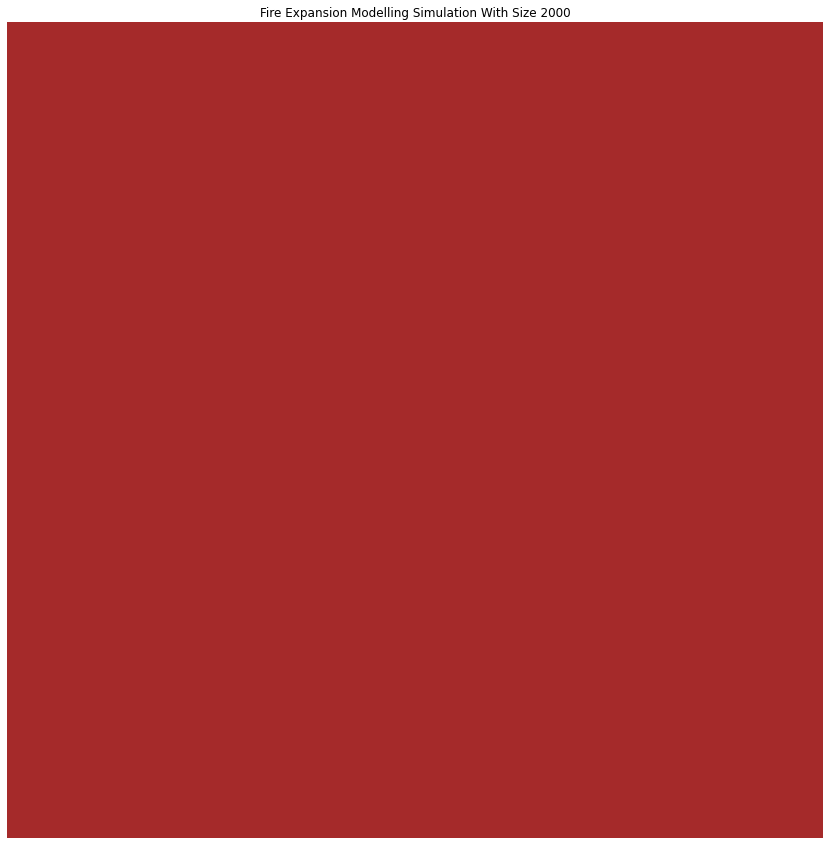

In [11]:
initTime = time()
forestSize = 2000

forest = InitializeForest(forestSize)

ExtendTheForestGrids(forest, forestSize)

print("Time used for an iteration (initializtion, fire expansion ) on grid size {0}: {1} seconds".format(forestSize, time() - initTime))

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_title('Fire Expansion Modelling Simulation With Size {0}'.format(forestSize))
ax.set_axis_off()
    
# plot the forest grid
siteGridInColor = ax.imshow(forest, cmap=cmap, norm=norm)
    
def animate(i):
    siteGridInColor.set_array(animate.siteGrid)
    animate.siteGrid = ExtendTheForestGrids(animate.siteGrid, forestSize)

animate.siteGrid = forest

anim = animation.FuncAnimation(fig, animate, interval=interval, frames=frame_size)

# save animation as gif file
anim.save('fire_expansion_simulation_{0}.gif'.format(forestSize))

plt.show()

Parallelizing the Simulation of the Spread

In [12]:
# Parallellized initializeforest 
numba.jit(nopython=True, parallel=True)
def ParallellizedInitializeForest(forestSize):
    
    # creating a two-dimensional array of the forestgrid of size forestSize with no trees
    forestGrid = np.zeros((forestSize, forestSize))
    
    # now we fill the forest with trees, empty area and trees on fire
    for i in numba.prange(forestSize):
        for j in numba.prange(forestSize):
            
            # if there is a tree, we set the value of the area to TREE
            if random() < probTree:
                # if the tree is on fire, we set the value of the area to TREE_ON_FIRE
                if random() < probBurning:
                    
                    forestGrid[i][j] = TREE_ON_FIRE
                else:
                    # the tree is not on fire, we set the value of the area to TREE
                    forestGrid[i][j] = TREE
            else:
                # the area is empty
                forestGrid[i][j] = NO_TREE
                
    # return the forest grid
    return forestGrid

In [13]:
# function to apply the spread to the forest site using the Moore neighborhood algorithm

numba.jit(nopython=True, parallel=True)
def ParallellizedApplyTheSpreadWithMoore(forest, forestSize):
    
    # looping through the forest grids (excluding the borders)
    for i in numba.prange(1, forestSize + 1):
        for j in numba.prange(1, forestSize + 1):
            
            # if the area has a tree
            if forest[i][j] == TREE:
                    
                # if a tree on the 8 moore neighborhoods 
                # (south, south-east, south-west, west, east, north, north-east, north-west)
                # is on fire, then the tree is likely to burn if it's not immune
                if (forest[i - 1][j] == TREE_ON_FIRE or forest[i + 1][j] == TREE_ON_FIRE or 
                    forest[i][j - 1] == TREE_ON_FIRE or forest[i][j + 1] == TREE_ON_FIRE or 
                    forest[i - 1][j - 1] == TREE_ON_FIRE or forest[i - 1][j + 1] == TREE_ON_FIRE or 
                    forest[i + 1][j - 1] == TREE_ON_FIRE or forest[i + 1][j + 1] == TREE_ON_FIRE):
    
                    # if the tree is immune to fire it will not burn
                    if random() < probImmune:
                        forest[i][j] = TREE
                    else:
                        forest[i][j] = TREE_ON_FIRE
                        
                # if the forest site suffered a lightning strike the tree is likely burns
                elif random() < probLightning:
                    
                    # # if the tree is immune to fire it will not burn
                    if random() < probImmune:
                        forest[i][j] = TREE
                    else:
                        forest[i][j] = TREE_ON_FIRE
                
                # else the tree doesn't burn cause there are no external influences
                else:
                    forest[i][j] = TREE 
            
            # if the area has a tree already on fire, then it burns to the ground
            elif forest[i][j] == TREE_ON_FIRE:
                forest[i][j] = NO_TREE
            
            # otherwise the area remains empty since there is no tree
            else:
                forest[i][j] = NO_TREE
            
    return forest

In [14]:
# extend the grid using periodic boundary conditions
numba.jit(nopython=True, parallel=True)
def ParallellizedExtendTheForestGrids(forest, forestSize):
    
    # extending the forest grid boundaries with ghost cells of opposite boundaries at all sides
    row_stack = np.row_stack((forest[-1,:], forest, forest[0,:]))
    extendedGrid = np.column_stack((row_stack[:,-1], row_stack, row_stack[:,0]))
    
    # now we can spread the fire  
    extendedGrid = ParallellizedApplyTheSpreadWithMoore(extendedGrid, forestSize)
    
    # remove the ghost cells around the boundaries before plotting
    forest = extendedGrid[1:forestSize + 1, 1:forestSize + 1]
        
    return forest

In [26]:
# compile the parallelized functions
forestSize = 100
forest = ParallellizedInitializeForest(forestSize)
forest_test = ParallellizedExtendTheForestGrids(forest, forestSize)

In [27]:
initTime = time()
forestSize = 100

forest = ParallellizedInitializeForest(forestSize)
forest_test = ParallellizedExtendTheForestGrids(forest, forestSize)
print("Time used for an iteration (parallelized) on grid size {0}: {1} seconds".format(forestSize, time() - initTime))

Time used for an iteration (parallelized) on grid size 100: 0.0639946460723877 seconds


In [17]:
initTime = time()
forestSize = 400

forest = ParallellizedInitializeForest(forestSize)
forest_test = ParallellizedExtendTheForestGrids(forest, forestSize)
print("Time used for an iteration (parallelized) on grid size {0}: {1} seconds".format(forestSize, time() - initTime))

Time used for an iteration (parallelized) on grid size 400: 0.9056921005249023 seconds


In [22]:
initTime = time()
forestSize = 800

forest = ParallellizedInitializeForest(forestSize)
forest_test = ParallellizedExtendTheForestGrids(forest, forestSize)
print("Time used for an iteration (parallelized) on grid size {0}: {1} seconds".format(forestSize, time() - initTime))

Time used for an iteration (parallelized) on grid size 800: 2.9878742694854736 seconds


In [19]:
initTime = time()
forestSize = 1000

forest = ParallellizedInitializeForest(forestSize)
forest_test = ParallellizedExtendTheForestGrids(forest, forestSize)
print("Time used for an iteration (parallelized) on grid size {0}: {1} seconds".format(forestSize, time() - initTime))

Time used for an iteration (parallelized) on grid size 1000: 4.852700233459473 seconds


In [20]:
initTime = time()
forestSize = 1200

forest = ParallellizedInitializeForest(forestSize)
forest_test = ParallellizedExtendTheForestGrids(forest, forestSize)
print("Time used for an iteration (parallelized) on grid size {0}: {1} seconds".format(forestSize, time() - initTime))

Time used for an iteration (parallelized) on grid size 1200: 6.7354326248168945 seconds


In [21]:
initTime = time()
forestSize = 2000

forest = ParallellizedInitializeForest(forestSize)
forest_test = ParallellizedExtendTheForestGrids(forest, forestSize)
print("Time used for an iteration (parallelized) on grid size {0}: {1} seconds".format(forestSize, time() - initTime))

Time used for an iteration (parallelized) on grid size 2000: 18.358621835708618 seconds
